### 1. Setup

In [1]:
# %%
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
from collections import OrderedDict
# Untuk progress bar, pastikan Anda sudah menginstal tqdm: pip install tqdm ipywidgets
try:
    from tqdm.notebook import trange
except ImportError:
    trange = lambda *args, **kwargs: args[0] # Fallback if tqdm is not installed

# Memastikan versi Python
assert sys.version_info >= (3, 5), "Membutuhkan Python 3.5 atau lebih baru"

# Memastikan versi Scikit-Learn
assert sklearn.__version__ >= "0.20", "Membutuhkan Scikit-Learn 0.20 atau lebih baru"

# Memastikan versi TensorFlow
# Perhatikan: %tensorflow_version hanya ada di Colab. Untuk lokal, abaikan ini.
try:
    # Mengatur versi TensorFlow untuk Colab jika dijalankan di sana
    if 'google.colab' in sys.modules:
        %tensorflow_version 2.x
except Exception:
    pass

# Pengaturan untuk output yang stabil dan plot
np.random.seed(42)
tf.random.set_seed(42)
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Direktori untuk menyimpan gambar
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """Fungsi untuk menyimpan gambar."""
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Menyimpan gambar", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

2025-06-20 11:29:11.227104: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750393751.266535  230925 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750393751.279173  230925 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-20 11:29:11.342242: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 2. Using TensorFlow like NumPy

#### Tensors dan operasi

##### Tensors

In [2]:
# Membuat matriks tensor
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
print("Matriks tensor:\n", t)
print("Bentuk matriks tensor:", t.shape)
print("Tipe data matriks tensor:", t.dtype)

Matriks tensor:
 tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
Bentuk matriks tensor: (2, 3)
Tipe data matriks tensor: <dtype: 'float32'>


I0000 00:00:1750393758.142290  230925 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4057 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5


In [3]:
# Membuat skalar tensor
scalar = tf.constant(42)
print("\nSkalar tensor:", scalar)


Skalar tensor: tf.Tensor(42, shape=(), dtype=int32)


##### Ops

In [4]:
print("t + 10:\n", t + 10)
print("tf.square(t):\n", tf.square(t))
print("t @ tf.transpose(t) (dot product):\n", t @ tf.transpose(t))

t + 10:
 tf.Tensor(
[[11. 12. 13.]
 [14. 15. 16.]], shape=(2, 3), dtype=float32)
tf.square(t):
 tf.Tensor(
[[ 1.  4.  9.]
 [16. 25. 36.]], shape=(2, 3), dtype=float32)
t @ tf.transpose(t) (dot product):
 tf.Tensor(
[[14. 32.]
 [32. 77.]], shape=(2, 2), dtype=float32)


W0000 00:00:1750393758.611591  230925 gpu_backend_lib.cc:579] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  ipykernel_launcher.runfiles/cuda_nvcc
  ipykern/cuda_nvcc
  
  /usr/local/cuda
  /home/ardi/miniconda3/lib/python3.12/site-packages/tensorflow/python/platform/../../../nvidia/cuda_nvcc
  /home/ardi/miniconda3/lib/python3.12/site-packages/tensorflow/python/platform/../../../../nvidia/cuda_nvcc
  /home/ardi/miniconda3/lib/python3.12/site-packages/tensorflow/python/platform/../../cuda
  .
You can choose the search directory by setting xla_gpu_cuda_data_dir in HloModule's DebugOptions.  For most apps, setting the environment variable XLA_FLAGS=--xla_gpu_cuda_data_dir=/path/to/cuda will work.


##### Menggunakan `keras.backend`

In [5]:
K = keras.backend
print("K.square(K.transpose(t)) + 10:\n", K.square(K.transpose(t)) + 10)

K.square(K.transpose(t)) + 10:
 tf.Tensor(
[[11. 26.]
 [14. 35.]
 [19. 46.]], shape=(3, 2), dtype=float32)


##### Dari/Ke NumPy

In [6]:
a = np.array([2., 4., 5.])
print("NumPy array ke Tensor:\n", tf.constant(a))
print("Tensor ke NumPy array (t.numpy()):\n", t.numpy())
print("Tensor ke NumPy array (np.array(t)):\n", np.array(t))
print("Operasi NumPy pada tensor (np.square(t)):\n", np.square(t)) # NumPy juga bisa operasi pada tensor TensorFlow

NumPy array ke Tensor:
 tf.Tensor([2. 4. 5.], shape=(3,), dtype=float64)
Tensor ke NumPy array (t.numpy()):
 [[1. 2. 3.]
 [4. 5. 6.]]
Tensor ke NumPy array (np.array(t)):
 [[1. 2. 3.]
 [4. 5. 6.]]
Operasi NumPy pada tensor (np.square(t)):
 [[ 1.  4.  9.]
 [16. 25. 36.]]


##### Tipe yang Konflik

In [7]:
try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print("\nError (konflik tipe data float dan int):\n", ex)

try:
    tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print("\nError (konflik tipe data float32 dan float64):\n", ex)

t2 = tf.constant(40., dtype=tf.float64)
print("\nHasil setelah casting tf.float64 ke tf.float32:\n", tf.constant(2.0) + tf.cast(t2, tf.float32))


Error (konflik tipe data float dan int):
 cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: 

Error (konflik tipe data float32 dan float64):
 cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: 

Hasil setelah casting tf.float64 ke tf.float32:
 tf.Tensor(42.0, shape=(), dtype=float32)


##### Strings

In [8]:
print("Tensor bytes:\n", tf.constant(b"hello world"))
print("Tensor string Unicode:\n", tf.constant("café"))

u = tf.constant([ord(c) for c in "café"])
print("\nKode Unicode untuk 'café':\n", u)
b = tf.strings.unicode_encode(u, "UTF-8")
print("Encoded UTF-8 bytes:\n", b)
print("Panjang string dalam karakter UTF-8:\n", tf.strings.length(b, unit="UTF8_CHAR"))
print("Decoded UTF-8 ke Unicode:\n", tf.strings.unicode_decode(b, "UTF-8"))

Tensor bytes:
 tf.Tensor(b'hello world', shape=(), dtype=string)
Tensor string Unicode:
 tf.Tensor(b'caf\xc3\xa9', shape=(), dtype=string)

Kode Unicode untuk 'café':
 tf.Tensor([ 99  97 102 233], shape=(4,), dtype=int32)
Encoded UTF-8 bytes:
 tf.Tensor(b'caf\xc3\xa9', shape=(), dtype=string)
Panjang string dalam karakter UTF-8:
 tf.Tensor(4, shape=(), dtype=int32)
Decoded UTF-8 ke Unicode:
 tf.Tensor([ 99  97 102 233], shape=(4,), dtype=int32)


##### String arrays

In [9]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])
print("Array string:\n", p)
print("Panjang setiap string dalam karakter UTF-8:\n", tf.strings.length(p, unit="UTF8_CHAR"))
r = tf.strings.unicode_decode(p, "UTF8")
print("Decoded string array:\n", r)
print("Mencetak objek RaggedTensor r:\n", r) # Akan mencetak representasi RaggedTensor

Array string:
 tf.Tensor([b'Caf\xc3\xa9' b'Coffee' b'caff\xc3\xa8' b'\xe5\x92\x96\xe5\x95\xa1'], shape=(4,), dtype=string)
Panjang setiap string dalam karakter UTF-8:
 tf.Tensor([4 6 5 2], shape=(4,), dtype=int32)
Decoded string array:
 <tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857]]>
Mencetak objek RaggedTensor r:
 <tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857]]>


##### Ragged tensors

In [10]:
# Contoh Ragged Tensor, yang dapat memiliki baris dengan panjang yang berbeda.
print("Elemen kedua dari r (indeks 1):\n", r[1])
print("Elemen dari r dengan indexing 1:3 (dari indeks 1 sampai 2):\n", r[1:3])

r2 = tf.ragged.constant([[65, 66], [], [67]])
print("Menggabungkan r dan r2 (axis=0):\n", tf.concat([r, r2], axis=0))

# Contoh yang akan berfungsi:
r_temp1 = tf.ragged.constant([[1, 2], [3], [4, 5, 6]])
r_temp2 = tf.ragged.constant([[7, 8], [9], [10, 11]])
print("Contoh tf.concat([r_temp1, r_temp2], axis=1):\n", tf.concat([r_temp1, r_temp2], axis=1))

r3 = tf.ragged.constant([[68, 69, 70], [71], [72], [73, 74]]) # Ubah r3 agar bisa diencode
print("Mengkodekan r3 ke UTF-8:\n", tf.strings.unicode_encode(r3, "UTF-8"))

# Mengubah ragged tensor menjadi dense tensor (mengisi dengan nilai default, biasanya 0)
# Perhatikan bahwa ini akan menambahkan padding jika baris memiliki panjang berbeda.
print("Mengubah r menjadi dense tensor:\n", r.to_tensor())

Elemen kedua dari r (indeks 1):
 tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


Elemen dari r dengan indexing 1:3 (dari indeks 1 sampai 2):
 <tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>
Menggabungkan r dan r2 (axis=0):
 <tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>
Contoh tf.concat([r_temp1, r_temp2], axis=1):
 <tf.RaggedTensor [[1, 2, 7, 8], [3, 9], [4, 5, 6, 10, 11]]>
Mengkodekan r3 ke UTF-8:
 tf.Tensor([b'DEF' b'G' b'H' b'IJ'], shape=(4,), dtype=string)
Mengubah r menjadi dense tensor:
 tf.Tensor(
[[   67    97   102   233     0     0]
 [   67   111   102   102   101   101]
 [   99    97   102   102   232     0]
 [21654 21857     0     0     0     0]], shape=(4, 6), dtype=int32)


##### Sparse tensors

In [11]:
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.],
                    dense_shape=[3, 4])
print("Sparse Tensor s:\n", s)
print("Mengubah sparse tensor ke dense tensor:\n", tf.sparse.to_dense(s))

Sparse Tensor s:
 SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))
Mengubah sparse tensor ke dense tensor:
 tf.Tensor(
[[0. 1. 0. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 3.]], shape=(3, 4), dtype=float32)


In [12]:
s2 = s * 2.0
print("Hasil s * 2.0:\n", tf.sparse.to_dense(s2))

Hasil s * 2.0:
 tf.Tensor(
[[0. 2. 0. 0.]
 [4. 0. 0. 0.]
 [0. 0. 0. 6.]], shape=(3, 4), dtype=float32)


In [13]:
try:
    s3 = s + 1. # Operasi ini tidak didukung langsung untuk SparseTensor
except TypeError as ex:
    print("\nError (operasi aritmatika langsung pada SparseTensor):\n", ex)


Error (operasi aritmatika langsung pada SparseTensor):
 unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [14]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
print("Hasil tf.sparse.sparse_dense_matmul(s, s4):\n", tf.sparse.sparse_dense_matmul(s, s4))

Hasil tf.sparse.sparse_dense_matmul(s, s4):
 tf.Tensor(
[[ 30.  40.]
 [ 20.  40.]
 [210. 240.]], shape=(3, 2), dtype=float32)


In [15]:
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]], # Indeks tidak berurutan
                     values=[1., 2.],
                     dense_shape=[3, 4])
print("\nSparse Tensor s5 (indeks tidak berurutan):\n", s5)


Sparse Tensor s5 (indeks tidak berurutan):
 SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [16]:
try:
    # tf.sparse.to_dense akan error jika indeks tidak terurut
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print("\nError (indeks Sparse Tensor tidak terurut):\n", ex)


Error (indeks Sparse Tensor tidak terurut):
 {{function_node __wrapped__SparseToDense_device_/job:localhost/replica:0/task:0/device:GPU:0}} indices[1] is out of order. Many sparse ops require sorted indices.
  Use `tf.sparse.reorder` to create a correctly ordered copy.


	 [[{{node SparseToDense}}]] [Op:SparseToDense] name: 


2025-06-20 11:29:19.148133: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[1] is out of order. Many sparse ops require sorted indices.
  Use `tf.sparse.reorder` to create a correctly ordered copy.


	 [[{{node SparseToDense}}]]


In [17]:
s6 = tf.sparse.reorder(s5)
print("Sparse Tensor s6 (setelah diurutkan):\n", tf.sparse.to_dense(s6))

Sparse Tensor s6 (setelah diurutkan):
 tf.Tensor(
[[0. 2. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(3, 4), dtype=float32)


##### Sets

In [18]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
print("Union dari set1 dan set2:\n", tf.sparse.to_dense(tf.sets.union(set1, set2)))
print("Difference dari set1 dan set2:\n", tf.sparse.to_dense(tf.sets.difference(set1, set2)))
print("Intersection dari set1 dan set2:\n", tf.sparse.to_dense(tf.sets.intersection(set1, set2)))

Union dari set1 dan set2:
 tf.Tensor(
[[ 2  3  4  5  6  7]
 [ 0  7  9 10  0  0]], shape=(2, 6), dtype=int32)
Difference dari set1 dan set2:
 tf.Tensor(
[[2 3 7]
 [7 0 0]], shape=(2, 3), dtype=int32)
Intersection dari set1 dan set2:
 tf.Tensor(
[[5 0]
 [0 9]], shape=(2, 2), dtype=int32)


##### Variables

In [19]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
print("Variabel v awal:\n", v)

Variabel v awal:
 <tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>


In [20]:
v.assign(2 * v)
print("\nv setelah v.assign(2 * v):\n", v)


v setelah v.assign(2 * v):
 <tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>


In [21]:
v[0, 1].assign(42)
print("\nv setelah v[0, 1].assign(42):\n", v)


v setelah v[0, 1].assign(42):
 <tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>


In [22]:
v[:, 2].assign([0., 1.])
print("\nv setelah v[:, 2].assign([0., 1.]):\n", v)


v setelah v[:, 2].assign([0., 1.]):
 <tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>


In [23]:
try:
    v[1] = [7., 8., 9.] # Tidak bisa menggunakan operator slicing Python biasa
except TypeError as ex:
    print("\nError (tidak bisa menggunakan operator slicing Python biasa untuk assign):\n", ex)


Error (tidak bisa menggunakan operator slicing Python biasa untuk assign):
 'ResourceVariable' object does not support item assignment


In [24]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]],
                    updates=[100., 200.])
print("\nv setelah scatter_nd_update:\n", v)


v setelah scatter_nd_update:
 <tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>


In [25]:
sparse_delta = tf.IndexedSlices(values=[[1., 2., 3.], [4., 5., 6.]],
                                indices=[1, 0])
v.scatter_update(sparse_delta)
print("\nv setelah scatter_update:\n", v)


v setelah scatter_update:
 <tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>


##### Tensor Arrays

In [26]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))

print("Membaca elemen kedua dari TensorArray (indeks 1):\n", array.read(1))
print("Menumpuk TensorArray menjadi satu tensor:\n", array.stack())

Membaca elemen kedua dari TensorArray (indeks 1):
 tf.Tensor([ 3. 10.], shape=(2,), dtype=float32)
Menumpuk TensorArray menjadi satu tensor:
 tf.Tensor(
[[1. 2.]
 [0. 0.]
 [5. 7.]], shape=(3, 2), dtype=float32)


In [27]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
print("Mean dari TensorArray:\n", mean)
print("Variance dari TensorArray:\n", variance)

Mean dari TensorArray:
 tf.Tensor([2. 3.], shape=(2,), dtype=float32)
Variance dari TensorArray:
 tf.Tensor([4.6666665 8.666667 ], shape=(2,), dtype=float32)


### 3. Customizing Models and Training Algorithms

#### Custom loss function

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Memastikan eager execution diaktifkan (seharusnya sudah default di TF2.x, tapi untuk jaga-jaga)
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

input_shape = X_train.shape[1:]

In [29]:
def huber_fn(y_true, y_pred):
    """Fungsi Huber loss."""
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

Menyimpan gambar huber_loss_plot


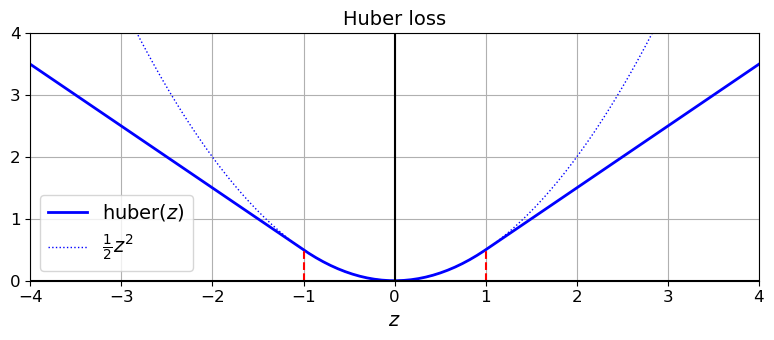

In [30]:
# Visualisasi Huber Loss
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
save_fig("huber_loss_plot")
plt.show()

In [31]:
# Membangun model dengan custom loss function
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

/home/ardi/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Menambahkan run_eagerly=True pada saat compile untuk memastikan eager execution
# Ini seringkali membantu dengan custom loss/metric functions yang melakukan operasi numpy() secara implisit
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"], run_eagerly=True)


print("Dataset info:")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Validation set shape: {X_valid_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

print("\nMelatih model dengan custom Huber loss function:")
history = model.fit(X_train_scaled, y_train, epochs=2,
                   validation_data=(X_valid_scaled, y_valid))

Dataset info:
Training set shape: (11610, 8)
Validation set shape: (3870, 8)
Test set shape: (5160, 8)

Melatih model dengan custom Huber loss function:
Epoch 1/2


363/363 ━━━━━━━━━━━━━━━━━━━━ 40s 107ms/step - loss: 1.0094 - mae: 1.4117 - val_loss: 0.2421 - val_mae: 0.5362
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 45s 124ms/step - loss: 0.2050 - mae: 0.4992 - val_loss: 0.1882 - val_mae: 0.4742


#### Saving/Loading Models with Custom Objects

In [33]:
# Menyimpan model
model.save("my_model_with_a_custom_loss.h5")
print("\nModel berhasil disimpan sebagai 'my_model_with_a_custom_loss.h5'")


Model berhasil disimpan sebagai 'my_model_with_a_custom_loss.h5'


In [34]:
tf.compat.v1.enable_eager_execution()
# Memuat model (membutuhkan custom_objects)
print("\nMemuat model dengan custom_objects:")
model = keras.models.load_model("my_model_with_a_custom_loss.h5",
                                custom_objects={"huber_fn": huber_fn})

# Setelah memuat model, kompilasi ulang dengan run_eagerly=True
# Ini penting karena model yang dimuat mungkin kehilangan pengaturan eager execution
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"], run_eagerly=True)


print("\nMelanjutkan pelatihan model yang dimuat:")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))


Memuat model dengan custom_objects:

Melanjutkan pelatihan model yang dimuat:
Epoch 1/2


363/363 ━━━━━━━━━━━━━━━━━━━━ 37s 103ms/step - loss: 0.1964 - mae: 0.4868 - val_loss: 0.1772 - val_mae: 0.4538
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 38s 105ms/step - loss: 0.1902 - mae: 0.4759 - val_loss: 0.1856 - val_mae: 0.4598


In [36]:
# Evaluate the model
print("\nEvaluasi model pada test set:")
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss (Huber): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")


Evaluasi model pada test set:
Test Loss (Huber): 0.1880
Test MAE: 0.4715


In [37]:
# Custom Huber loss dengan threshold yang dapat dikonfigurasi
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [38]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])
print("\nMelatih model dengan Huber loss dengan threshold 2.0:")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))


Melatih model dengan Huber loss dengan threshold 2.0:
Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 41s 113ms/step - loss: 0.2109 - mae: 0.4738 - val_loss: 0.2116 - val_mae: 0.4530
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 42s 114ms/step - loss: 0.2037 - mae: 0.4636 - val_loss: 0.1961 - val_mae: 0.4500


In [39]:
model.save("my_model_with_a_custom_loss_threshold_2.h5")

In [40]:
model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
                                custom_objects={"huber_fn": create_huber(2.0)})

model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

print("\nMelanjutkan pelatihan model yang dimuat dengan threshold 2.0:")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))


Melanjutkan pelatihan model yang dimuat dengan threshold 2.0:
Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 40s 110ms/step - loss: 0.2087 - mae: 0.4689 - val_loss: 0.2223 - val_mae: 0.4566
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 46s 127ms/step - loss: 0.1963 - mae: 0.4571 - val_loss: 0.1982 - val_mae: 0.4427


In [43]:
from keras.saving import register_keras_serializable

# Membuat class HuberLoss sebagai subclass keras.losses.Loss
@register_keras_serializable()
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)

    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [44]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [45]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [46]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])
print("\nMelatih model dengan HuberLoss class:")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))


Melatih model dengan HuberLoss class:
Epoch 1/2


363/363 ━━━━━━━━━━━━━━━━━━━━ 42s 116ms/step - loss: 1.6055 - mae: 1.4915 - val_loss: 0.3467 - val_mae: 0.5657
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 49s 136ms/step - loss: 0.2484 - mae: 0.5129 - val_loss: 0.2704 - val_mae: 0.5183


In [47]:
model.save("my_model_with_a_custom_loss_class.h5")

In [48]:
model = keras.models.load_model("my_model_with_a_custom_loss_class.h5",
                                custom_objects={"HuberLoss": HuberLoss})
print("\nMelanjutkan pelatihan model yang dimuat dengan HuberLoss class:")

model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
print("Threshold HuberLoss yang dimuat:", model.loss.threshold)


Melanjutkan pelatihan model yang dimuat dengan HuberLoss class:
Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 39s 108ms/step - loss: 0.2380 - mae: 0.5066 - val_loss: 0.2222 - val_mae: 0.4810
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 39s 108ms/step - loss: 0.2266 - mae: 0.4962 - val_loss: 0.2398 - val_mae: 0.4858
Threshold HuberLoss yang dimuat: 2.0


#### Custom Activation Functions, Initializers, Regularizers, and Constraints

In [49]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
from tensorflow.keras.layers import Activation
from tensorflow.keras.initializers import Initializer
from tensorflow.keras.regularizers import Regularizer
from tensorflow.keras.constraints import Constraint

# Custom activation function
@register_keras_serializable()
def my_softplus(z):
    """Fungsi aktivasi softplus kustom."""
    return tf.math.log(tf.exp(z) + 1.0)

# Custom initializer
@register_keras_serializable()
class MyGlorotInitializer(Initializer):
    def __call__(self, shape, dtype=None):
        if dtype is None:
            dtype = tf.float32  # Default dtype
        stddev = tf.sqrt(2. / (shape[0] + shape[1]))
        return tf.random.normal(shape, stddev=stddev, dtype=dtype)

    def get_config(self):
        return {}

# Custom regularizer
@register_keras_serializable()
class MyL1Regularizer(Regularizer):
    def __init__(self, factor=0.01):
        self.factor = factor

    def __call__(self, weights):
        return self.factor * tf.reduce_sum(tf.abs(weights))

    def get_config(self):
        return {"factor": self.factor}

# Custom constraint
@register_keras_serializable()
class MyPositiveWeights(Constraint):
    def __call__(self, weights):
        return tf.where(weights < 0., tf.zeros_like(weights), weights)

    def get_config(self):
        return {}

# Membuat instance dari custom komponen
my_glorot_initializer_instance = MyGlorotInitializer()
my_l1_regularizer_instance = MyL1Regularizer(0.01)
my_positive_weights_instance = MyPositiveWeights()

In [51]:
# Perbaikan: Gunakan instance dari class custom untuk initializer, regularizer, dan constraint
layer = keras.layers.Dense(1, activation=my_softplus,
                            kernel_initializer=my_glorot_initializer_instance,
                            kernel_regularizer=my_l1_regularizer_instance,
                            kernel_constraint=my_positive_weights_instance)

In [52]:
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer_instance,
                       kernel_constraint=my_positive_weights_instance,
                       kernel_initializer=my_glorot_initializer_instance),
])


In [54]:
# Setelah membangun model, compile dan latih
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"], run_eagerly=True) # Tambahkan run_eagerly=True
print("\nMelatih model dengan custom activation, initializer, regularizer, dan constraint:")
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2,
          validation_data=(X_valid_scaled.astype(np.float32), y_valid.astype(np.float32)))


Melatih model dengan custom activation, initializer, regularizer, dan constraint:
Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 40s 108ms/step - loss: 1.0727 - mae: 1.1630 - val_loss: 0.3746 - val_mae: 0.5655
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - loss: 0.3044 - mae: 0.5286 - val_loss: 0.3124 - val_mae: 0.5067


In [55]:
model.save("my_model_with_many_custom_parts.h5")

In [56]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
        "my_l1_regularizer": my_l1_regularizer_instance,
        "my_positive_weights": my_positive_weights_instance,
        "my_glorot_initializer": my_glorot_initializer_instance,
        "my_softplus": my_softplus,
    })

In [57]:
# Membuat class MyL1Regularizer sebagai subclass keras.regularizers.Regularizer
@register_keras_serializable()
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

In [58]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [59]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer_instance,
                       kernel_constraint=my_positive_weights_instance,
                       kernel_initializer=my_glorot_initializer_instance),
])

In [60]:
model.compile(loss=keras.losses.MeanSquaredError(),
              optimizer="nadam",
              metrics=[keras.metrics.MeanAbsoluteError()])

print("\nMelatih model dengan MyL1Regularizer class:")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))


Melatih model dengan MyL1Regularizer class:
Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 40s 110ms/step - loss: 2.4469 - mean_absolute_error: 1.1762 - val_loss: 3.0741 - val_mean_absolute_error: 0.6076
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 42s 117ms/step - loss: 0.6622 - mean_absolute_error: 0.5600 - val_loss: 2.3182 - val_mean_absolute_error: 0.5429


In [61]:
model.save("my_model_with_many_custom_parts.h5")

In [62]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
        "my_l1_regularizer": my_l1_regularizer_instance,
        "my_positive_weights": my_positive_weights_instance,
        "my_glorot_initializer": my_glorot_initializer_instance,
        "my_softplus": my_softplus,
        "MeanSquaredError": keras.losses.MeanSquaredError,
        "MeanAbsoluteError": keras.metrics.MeanAbsoluteError
    })


#### Custom Metrics

In [63]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [64]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [65]:
# Menggunakan fungsi huber_fn sebagai metrik
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])
print("\nMelatih model dengan custom metric (huber_fn):")
model.fit(X_train_scaled, y_train, epochs=2)


Melatih model dengan custom metric (huber_fn):
Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 34s 94ms/step - huber_fn: 1.4861 - loss: 3.3278
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 35s 97ms/step - huber_fn: 0.2502 - loss: 0.5120


In [66]:
# Perbandingan loss dan metrik saat menggunakan sample_weight
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 38s 104ms/step - huber_fn: 0.2279 - loss: 0.1117
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 37s 101ms/step - huber_fn: 0.2178 - loss: 0.1070


In [67]:
# Periksa perbedaan antara loss dan metrik (akan ada perbedaan karena definisi)
print(f"\nLoss epoch 0: {history.history['loss'][0]:.4f}")
print(f"Huber_fn (metric) epoch 0 * mean_sample_weight: {history.history['huber_fn'][0] * sample_weight.mean():.4f}")


Loss epoch 0: 0.1135
Huber_fn (metric) epoch 0 * mean_sample_weight: 0.1137


#### Streaming metrics

In [68]:
# Contoh metrik streaming (misalnya, precision) dan cara membuat metrik streaming kustom.
precision = keras.metrics.Precision()
print("\nPrecision (update 1):\n", precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1]))
print("Precision (update 2):\n", precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0]))
print("Hasil akhir Precision:\n", precision.result())
print("Variabel Precision:\n", precision.variables)
precision.reset_state()
print("Variabel Precision setelah reset:\n", precision.variables)


Precision (update 1):
 tf.Tensor(0.8, shape=(), dtype=float32)
Precision (update 2):
 tf.Tensor(0.5, shape=(), dtype=float32)
Hasil akhir Precision:
 tf.Tensor(0.5, shape=(), dtype=float32)
Variabel Precision:
 [<Variable path=precision/true_positives, shape=(1,), dtype=float32, value=[4.]>, <Variable path=precision/false_positives, shape=(1,), dtype=float32, value=[4.]>]
Variabel Precision setelah reset:
 [<Variable path=precision/true_positives, shape=(1,), dtype=float32, value=[0.]>, <Variable path=precision/false_positives, shape=(1,), dtype=float32, value=[0.]>]


In [95]:
# Membuat class HuberMetric sebagai subclass keras.metrics.Metric
@register_keras_serializable()
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs)
        self.threshold = threshold
        self.total = self.add_weight(name="total", initializer="zeros")
        self.count = self.add_weight(name="count", initializer="zeros")
    def update_state(self, y_true, y_pred, sample_weight=None):
        error = y_true - y_pred
        is_small = tf.abs(error) < self.threshold
        squared = 0.5 * tf.square(error)
        linear = self.threshold * tf.abs(error) - 0.5 * self.threshold**2
        metric = tf.where(is_small, squared, linear)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [96]:
m = HuberMetric(2.)
print("\nHuberMetric (update 1):\n", m(tf.constant([[2.]]), tf.constant([[10.]])) )
print("HuberMetric (update 2):\n", m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]])))
print("Hasil HuberMetric:\n", m.result())
print("Variabel HuberMetric:\n", m.variables)
m.reset_state()
print("Variabel HuberMetric setelah reset:\n", m.variables)


HuberMetric (update 1):
 tf.Tensor(14.0, shape=(), dtype=float32)
HuberMetric (update 2):
 tf.Tensor(7.0, shape=(), dtype=float32)
Hasil HuberMetric:
 tf.Tensor(7.0, shape=(), dtype=float32)
Variabel HuberMetric:
 [<Variable path=huber_metric_1/total, shape=(), dtype=float32, value=21.0>, <Variable path=huber_metric_1/count, shape=(), dtype=float32, value=3.0>]
Variabel HuberMetric setelah reset:
 [<Variable path=huber_metric_1/total, shape=(), dtype=float32, value=0.0>, <Variable path=huber_metric_1/count, shape=(), dtype=float32, value=0.0>]


In [97]:
# Menguji HuberMetric class pada model
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [99]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [100]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])
print("\nMelatih model dengan HuberMetric class:")
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)


Melatih model dengan HuberMetric class:
Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 36s 99ms/step - huber_metric: 1.3709 - loss: 1.3709
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 33s 91ms/step - huber_metric: 0.2623 - loss: 0.2623


In [101]:
model.save("my_model_with_custom_metric.keras")

In [103]:
model = keras.models.load_model(
    "my_model_with_custom_metric.keras",
    custom_objects={
        "HuberMetric": HuberMetric,
        "huber_fn": create_huber(2.0)
    }
)

model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])
                                               
print("\nMelanjutkan pelatihan model yang dimuat dengan HuberMetric class:")
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)


Melanjutkan pelatihan model yang dimuat dengan HuberMetric class:
Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 35s 97ms/step - huber_metric_1: 0.2405 - loss: 0.2405
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 32s 89ms/step - huber_metric_1: 0.2289 - loss: 0.2289


In [105]:
print("Daftar metrik:")
for m in model.metrics:
    print(f"- {m.name}: {type(m)}")

model.save("my_model_with_custom_metric.keras")

# Akses threshold metrik (perhatikan indeks mungkin berbeda tergantung versi TF)
for metric in model.metrics:
    if isinstance(metric, HuberMetric):
        print("Threshold HuberMetric yang dimuat:", metric.threshold)


Daftar metrik:
- loss: <class 'keras.src.metrics.reduction_metrics.Mean'>
- compile_metrics: <class 'keras.src.trainers.compile_utils.CompileMetrics'>


In [106]:
# Versi HuberMetric yang lebih sederhana, subclass dari keras.metrics.Mean
@register_keras_serializable()
class HuberMetric(keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)
        
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)
        
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [107]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [108]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [109]:
model.compile(loss=keras.losses.Huber(2.0), optimizer="nadam", weighted_metrics=[HuberMetric(2.0)])
print("\nMelatih model dengan HuberMetric (v2) dan weighted_metrics:")
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32),
                    epochs=2, sample_weight=sample_weight)


Melatih model dengan HuberMetric (v2) dan weighted_metrics:
Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 37s 102ms/step - HuberMetric: 1.4864 - loss: 0.7471
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 35s 95ms/step - HuberMetric: 0.2579 - loss: 0.1271


In [110]:
print(f"\nLoss epoch 0: {history.history['loss'][0]:.4f}")
print(f"HuberMetric (metric) epoch 0: {history.history['HuberMetric'][0]:.4f}")


Loss epoch 0: 0.4256
HuberMetric (metric) epoch 0: 0.8577


In [111]:
model.save("my_model_with_a_custom_metric_v2.h5")

In [113]:
model = keras.models.load_model("my_model_with_a_custom_metric_v2.h5")
print("\nMelanjutkan pelatihan model yang dimuat dengan HuberMetric (v2):")
model.compile(loss=keras.losses.Huber(2.0), optimizer="nadam", weighted_metrics=[HuberMetric(2.0)])
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)


Melanjutkan pelatihan model yang dimuat dengan HuberMetric (v2):
Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 34s 95ms/step - HuberMetric: 0.2365 - loss: 0.2365
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 35s 95ms/step - HuberMetric: 0.2233 - loss: 0.2233


In [114]:
for metric in model.metrics:
    if isinstance(metric, HuberMetric):
        print("Threshold HuberMetric (v2) yang dimuat:", metric.threshold)

#### Custom Layers

In [119]:
# Membuat layer kustom.
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))
input_tensor = tf.constant([-1., 0., 1.], dtype=tf.float32)

print("\nOutput exponential_layer untuk [-1., 0., 1.]:\n", exponential_layer(input_tensor).numpy())



Output exponential_layer untuk [-1., 0., 1.]:
 [0.36787948 1.         2.7182817 ]


In [120]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [121]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer # Custom layer added at the end
])

In [122]:
model.compile(loss="mse", optimizer="sgd")
print("\nMelatih model dengan Exponential Layer:")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
print("\nEvaluasi model dengan Exponential Layer:")
model.evaluate(X_test_scaled, y_test)


Melatih model dengan Exponential Layer:
Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - loss: 0.9537 - val_loss: 0.8792
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - loss: 0.6431 - val_loss: 0.4506
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 0.4496 - val_loss: 0.3973
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - loss: 0.4116 - val_loss: 0.3648
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - loss: 0.4008 - val_loss: 0.3605

Evaluasi model dengan Exponential Layer:
162/162 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.3810


0.37481462955474854

In [126]:
# Class MyDense kustom
@register_keras_serializable()
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # Must be at the end of build

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape[:-1] + (self.units,))


    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

In [127]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [128]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

/tmp/ipykernel_230925/1644174987.py:5: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [135]:
from keras.losses import MeanSquaredError

model.compile(loss=MeanSquaredError(), optimizer="nadam")
print("\nMelatih model dengan MyDense custom layer:")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
print("\nEvaluasi model dengan MyDense custom layer:")
model.evaluate(X_test_scaled, y_test)


Melatih model dengan MyDense custom layer:
Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 35s 95ms/step - loss: 0.5318 - val_loss: 2.0399
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 34s 95ms/step - loss: 0.4257 - val_loss: 0.4713

Evaluasi model dengan MyDense custom layer:
162/162 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.4094


0.4058610796928406

In [136]:
model.save("my_model_with_a_custom_layer.h5")

In [137]:
model = keras.models.load_model(
    "my_model_with_a_custom_layer.h5",
    custom_objects={
        "MyDense": MyDense,
        "mse": MeanSquaredError()
    }
)

In [138]:
# Class MyMultiLayer kustom (menghasilkan banyak output)
@register_keras_serializable()
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        print("X1.shape: ", X1.shape ," X2.shape: ", X2.shape) # Debugging
        return X1 + X2, X1 * X2

    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]

In [139]:
# Penggunaan MyMultiLayer dengan Functional API
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

In [140]:
# Memisahkan data untuk input multi-layer
def split_data(data):
    columns_count = data.shape[-1]
    half = columns_count // 2
    return data[:, :half], data[:, half:]

X_train_scaled_A, X_train_scaled_B = split_data(X_train_scaled)
X_valid_scaled_A, X_valid_scaled_B = split_data(X_valid_scaled)
X_test_scaled_A, X_test_scaled_B = split_data(X_test_scaled)

print(f"\nBentuk X_train_scaled_A: {X_train_scaled_A.shape}, Bentuk X_train_scaled_B: {X_train_scaled_B.shape}")


Bentuk X_train_scaled_A: (11610, 4), Bentuk X_train_scaled_B: (11610, 4)


In [141]:
# Panggilan dengan data aktual (shape akan sepenuhnya ditentukan)
outputs1, outputs2 = MyMultiLayer()((X_train_scaled_A, X_train_scaled_B))

X1.shape:  (11610, 4)  X2.shape:  (11610, 4)


In [142]:
# Membangun model dengan MyMultiLayer
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [143]:
input_A = keras.layers.Input(shape=X_train_scaled_A.shape[-1:])
input_B = keras.layers.Input(shape=X_train_scaled_B.shape[-1:])
hidden_A, hidden_B = MyMultiLayer()((input_A, input_B))
hidden_A = keras.layers.Dense(30, activation='selu')(hidden_A)
hidden_B = keras.layers.Dense(30, activation='selu')(hidden_B)
concat = keras.layers.Concatenate()((hidden_A, hidden_B))
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [145]:
model.compile(loss=MeanSquaredError(), optimizer="nadam")
print("\nMelatih model dengan MyMultiLayer:")
model.fit((X_train_scaled_A, X_train_scaled_B), y_train, epochs=2,
          validation_data=((X_valid_scaled_A, X_valid_scaled_B), y_valid))


Melatih model dengan MyMultiLayer:
Epoch 1/2
X1.shape:  (32, 4)  X2.shape:  (32, 4)
  1/363 ━━━━━━━━━━━━━━━━━━━━ 1:07 186ms/step - loss: 3.0163X1.shape:  (32, 4)  X2.shape:  (32, 4)
  2/363 ━━━━━━━━━━━━━━━━━━━━ 50s 140ms/step - loss: 3.2335 X1.shape:  (32, 4)  X2.shape:  (32, 4)
  3/363 ━━━━━━━━━━━━━━━━━━━━ 56s 156ms/step - loss: 3.1325X1.shape:  (32, 4)  X2.shape:  (32, 4)
  4/363 ━━━━━━━━━━━━━━━━━━━━ 54s 153ms/step - loss: 3.0986X1.shape:  (32, 4)  X2.shape:  (32, 4)
  5/363 ━━━━━━━━━━━━━━━━━━━━ 54s 153ms/step - loss: 3.1081X1.shape:  (32, 4)  X2.shape:  (32, 4)
  6/363 ━━━━━━━━━━━━━━━━━━━━ 50s 140ms/step - loss: 3.1149X1.shape:  (32, 4)  X2.shape:  (32, 4)
  7/363 ━━━━━━━━━━━━━━━━━━━━ 47s 132ms/step - loss: 3.1227X1.shape:  (32, 4)  X2.shape:  (32, 4)
  8/363 ━━━━━━━━━━━━━━━━━━━━ 44s 125ms/step - loss: 3.1193X1.shape:  (32, 4)  X2.shape:  (32, 4)
  9/363 ━━━━━━━━━━━━━━━━━━━━ 42s 120ms/step - loss: 3.1161X1.shape:  (32, 4)  X2.shape:  (32, 4)
 10/363 ━━━━━━━━━━━━━━━━━━━━ 41s 119ms/s

In [146]:
# Layer dengan perilaku berbeda selama training dan testing
@register_keras_serializable()
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

In [147]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [148]:
model = keras.models.Sequential([
    AddGaussianNoise(stddev=1.0, input_shape=input_shape), # Add input_shape to the first layer
    keras.layers.Dense(30, activation="selu"),
    keras.layers.Dense(1)
])

/tmp/ipykernel_230925/4085291381.py:5: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [149]:
model.compile(loss="mse", optimizer="nadam")
print("\nMelatih model dengan AddGaussianNoise layer:")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
print("\nEvaluasi model dengan AddGaussianNoise layer:")
model.evaluate(X_test_scaled, y_test)


Melatih model dengan AddGaussianNoise layer:
Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 35s 95ms/step - loss: 3.4236 - val_loss: 1.4222
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 35s 96ms/step - loss: 1.0115 - val_loss: 0.7626

Evaluasi model dengan AddGaussianNoise layer:
162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.7829


0.779594361782074

#### Custom Models

In [157]:
# Membuat model kustom dengan subclassing `keras.models.Model`.
X_new_scaled = X_test_scaled # Menggunakan X_test_scaled untuk prediksi

In [158]:
# Residual Block untuk model kustom
@register_keras_serializable()
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z # Add input to output (skip connection)
    
    def get_config(self):
        config = super().get_config()
        config.update({"n_layers": len(self.hidden), "n_neurons": self.hidden[0].units})
        return config

In [159]:
# Model ResidualRegressor kustom
@register_keras_serializable()
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.output_dim = output_dim
        self.hidden1 = keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(4):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

    def get_config(self):
        config = super().get_config()
        config.update({"output_dim": self.output_dim})
        return config

    @classmethod
    def from_config(cls, config):
        output_dim = config.pop("output_dim")
        return cls(output_dim=output_dim, **config)


In [160]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [161]:
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
print("\nMelatih Custom ResidualRegressor model:")
history = model.fit(X_train_scaled, y_train, epochs=4) # Mengurangi epoch jika terlalu lama
print("\nEvaluasi Custom ResidualRegressor model:")
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)


Melatih Custom ResidualRegressor model:
Epoch 1/4
363/363 ━━━━━━━━━━━━━━━━━━━━ 84s 229ms/step - loss: 27.5502
Epoch 2/4
363/363 ━━━━━━━━━━━━━━━━━━━━ 81s 224ms/step - loss: 3.8500
Epoch 3/4
363/363 ━━━━━━━━━━━━━━━━━━━━ 82s 227ms/step - loss: 1.7384
Epoch 4/4
363/363 ━━━━━━━━━━━━━━━━━━━━ 88s 243ms/step - loss: 0.7171

Evaluasi Custom ResidualRegressor model:
162/162 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 7.2644
162/162 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


In [162]:
# Menyimpan dan memuat model kustom (format SavedModel direkomendasikan)
model.save("my_custom_model.keras")
model = keras.models.load_model("my_custom_model.keras")
print("\nMelanjutkan pelatihan model kustom yang dimuat:")
history = model.fit(X_train_scaled, y_train, epochs=4) # Mengurangi epoch jika terlalu lama


Melanjutkan pelatihan model kustom yang dimuat:
Epoch 1/4
363/363 ━━━━━━━━━━━━━━━━━━━━ 79s 217ms/step - loss: 2.4661
Epoch 2/4
363/363 ━━━━━━━━━━━━━━━━━━━━ 92s 254ms/step - loss: 0.5768
Epoch 3/4
363/363 ━━━━━━━━━━━━━━━━━━━━ 83s 228ms/step - loss: 0.8610
Epoch 4/4
363/363 ━━━━━━━━━━━━━━━━━━━━ 81s 222ms/step - loss: 0.5564


In [163]:
# Model kustom menggunakan Sequential API (jika memungkinkan)
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [164]:
block1 = ResidualBlock(2, 30)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    block1, block1, block1, block1, # Menggunakan instance block yang sama empat kali
    ResidualBlock(2, 30), # Instance block yang berbeda
    keras.layers.Dense(1)
])

In [165]:
model.compile(loss="mse", optimizer="nadam")
print("\nMelatih model dengan ResidualBlock menggunakan Sequential API:")
history = model.fit(X_train_scaled, y_train, epochs=4) # Mengurangi epoch
print("\nEvaluasi model dengan ResidualBlock menggunakan Sequential API:")
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)


Melatih model dengan ResidualBlock menggunakan Sequential API:
Epoch 1/4
363/363 ━━━━━━━━━━━━━━━━━━━━ 76s 207ms/step - loss: 15.2378
Epoch 2/4
363/363 ━━━━━━━━━━━━━━━━━━━━ 80s 221ms/step - loss: 1.3766
Epoch 3/4
363/363 ━━━━━━━━━━━━━━━━━━━━ 79s 219ms/step - loss: 0.7080
Epoch 4/4
363/363 ━━━━━━━━━━━━━━━━━━━━ 75s 207ms/step - loss: 0.5971

Evaluasi model dengan ResidualBlock menggunakan Sequential API:
162/162 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.9657
162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step


#### Losses and Metrics Based on Model Internals

In [170]:
# Membuat model dengan loss dan metrik yang bergantung pada internal model (misalnya, rekonstruksi loss).
class ReconstructingRegressor(keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation="selu",
                                          kernel_initializer="lecun_normal")
                       for _ in range(5)]
        self.out = keras.layers.Dense(output_dim)
        self.reconstruction_mean = keras.metrics.Mean(name="reconstruction_error")
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mae_metric = keras.metrics.MeanAbsoluteError(name="mae")

    def build(self, input_shape):
        n_inputs = input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs)

    def call(self, inputs, training=False):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return self.out(Z), self.reconstruct(Z)

    def train_step(self, data):
        X, y = data
        with tf.GradientTape() as tape:
            y_pred, reconstruction = self(X, training=True)
            main_loss = self.compiled_loss(y, y_pred)
            recon_loss = tf.reduce_mean(tf.square(reconstruction - X))
            total_loss = main_loss + 0.05 * recon_loss
        grads = tape.gradient(total_loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        self.reconstruction_mean.update_state(recon_loss)
        self.loss_tracker.update_state(total_loss)
        self.mae_metric.update_state(y, y_pred)
        return {
            "loss": self.loss_tracker.result(),
            "mae": self.mae_metric.result(),
            "reconstruction_error": self.reconstruction_mean.result()
        }

    def test_step(self, data):
        X, y = data
        y_pred, reconstruction = self(X, training=False)
        main_loss = self.compiled_loss(y, y_pred)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - X))
        total_loss = main_loss + 0.05 * recon_loss
        self.reconstruction_mean.update_state(recon_loss)
        self.loss_tracker.update_state(total_loss)
        self.mae_metric.update_state(y, y_pred)
        return {
            "loss": self.loss_tracker.result(),
            "mae": self.mae_metric.result(),
            "reconstruction_error": self.reconstruction_mean.result()
        }

    @property
    def metrics(self):
        return [self.loss_tracker, self.mae_metric, self.reconstruction_mean]


In [171]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [172]:
model = ReconstructingRegressor(1)
model.build((None, X_train_scaled.shape[1]))
model.compile(optimizer="nadam", loss="mse")

print("\nMelatih ReconstructingRegressor model:")
history = model.fit(X_train_scaled, y_train, epochs=2)

y_pred, _ = model.predict(X_test_scaled)


Melatih ReconstructingRegressor model:
Epoch 1/2


/home/ardi/miniconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py:665: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight, training)`.
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 83s 229ms/step - loss: 1.0959 - mae: 0.7285 - reconstruction_error: 1.6768
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 86s 237ms/step - loss: 0.4265 - mae: 0.4605 - reconstruction_error: 0.4655
162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


#### Computing Gradients with Autodiff

In [173]:
# Menghitung gradien menggunakan Automatic Differentiation (Autodiff) TensorFlow.
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

w1, w2 = tf.Variable(5.), tf.Variable(3.)

In [174]:
# Menghitung gradien
with tf.GradientTape() as tape:
    z = f(w1, w2)
gradients = tape.gradient(z, [w1, w2])
print("\nGradien z terhadap [w1, w2]:\n", gradients)


Gradien z terhadap [w1, w2]:
 [<tf.Tensor: shape=(), dtype=float32, numpy=36.0>, <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]


In [175]:
# Menghitung gradien secara terpisah (membutuhkan persistent=True)
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)
dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2) # Sekarang berfungsi
del tape
print("\nGradien z terhadap w1:", dz_dw1)
print("Gradien z terhadap w2:", dz_dw2)


Gradien z terhadap w1: tf.Tensor(36.0, shape=(), dtype=float32)
Gradien z terhadap w2: tf.Tensor(10.0, shape=(), dtype=float32)


In [176]:
# Gradien untuk konstanta (defaultnya None, harus di-watch)
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)
gradients = tape.gradient(z, [c1, c2])
print("\nGradien z terhadap [c1, c2] (tanpa watch, akan None):\n", gradients)


Gradien z terhadap [c1, c2] (tanpa watch, akan None):
 [None, None]


In [177]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)
gradients = tape.gradient(z, [c1, c2])
print("\nGradien z terhadap [c1, c2] (dengan watch):\n", gradients)


Gradien z terhadap [c1, c2] (dengan watch):
 [<tf.Tensor: shape=(), dtype=float32, numpy=36.0>, <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]


In [178]:
# Gradien dari multiple outputs
with tf.GradientTape(persistent=True) as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

# Gradien total adalah jumlah gradien individu
total_gradients = tf.reduce_sum(tf.stack([tape.gradient(z, [w1, w2]) for z in (z1, z2, z3)]), axis=0)
print("\nGradien total dari [z1, z2, z3] terhadap [w1, w2]:\n", total_gradients)


Gradien total dari [z1, z2, z3] terhadap [w1, w2]:
 tf.Tensor([136.  30.], shape=(2,), dtype=float32)


In [179]:
del tape # Penting untuk menghapus tape persistent setelah digunakan

In [180]:
# Hessian (turunan kedua)
w1, w2 = tf.Variable(5.), tf.Variable(3.) # Reset variabel
with tf.GradientTape(persistent=True) as hessian_tape:
    with tf.GradientTape() as jacobian_tape:
        z = f(w1, w2)
    jacobians = jacobian_tape.gradient(z, [w1, w2])
hessians = [hessian_tape.gradient(jacobian, [w1, w2])
            for jacobian in jacobians]
del hessian_tape
print("\nJacobians:\n", jacobians)
print("Hessians:\n", hessians)


Jacobians:
 [<tf.Tensor: shape=(), dtype=float32, numpy=36.0>, <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]
Hessians:
 [[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>, <tf.Tensor: shape=(), dtype=float32, numpy=2.0>], [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None]]


In [181]:
# tf.stop_gradient
def f_stop_gradient(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2) # w2 tidak akan berkontribusi pada gradien

with tf.GradientTape() as tape:
    z_sg = f_stop_gradient(w1, w2)
print("\nGradien dengan tf.stop_gradient (w2 tidak berkontribusi):\n", tape.gradient(z_sg, [w1, w2]))


Gradien dengan tf.stop_gradient (w2 tidak berkontribusi):
 [<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]


In [182]:
# Mengatasi gradien yang tidak stabil (contoh my_softplus)
def my_softplus(x):
    return tf.math.log(tf.exp(x) + 1.)

x = tf.Variable(100.)
with tf.GradientTape() as tape:
    z = my_softplus(x)
print("\nGradien my_softplus pada x=100 (akan mendekati 1):\n", tape.gradient(z, [x]))


Gradien my_softplus pada x=100 (akan mendekati 1):
 [<tf.Tensor: shape=(), dtype=float32, numpy=nan>]


In [183]:
# my_better_softplus untuk stabilitas numerik
@tf.function
def my_better_softplus(z):
    # Mengatasi masalah numerik untuk z yang sangat besar
    return tf.where(z > 30., z, tf.math.log(tf.exp(z) + 1.))

x_large = tf.Variable([1000.])
with tf.GradientTape() as tape:
    z_better = my_better_softplus(x_large)
print("\nOutput dan gradien my_better_softplus pada x=1000:\n", z_better, tape.gradient(z_better, [x_large]))


Output dan gradien my_better_softplus pada x=1000:
 tf.Tensor([1000.], shape=(1,), dtype=float32) [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>]


#### Custom Training Loops

In [184]:
# Membuat *custom training loop* tanpa menggunakan `model.fit()`.
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [185]:
l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal", kernel_regularizer=l2_reg),
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [186]:
def random_batch(X, y, batch_size=32):
    """Membangkitkan batch acak dari data."""
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]
    
def print_status_bar(iteration, total, loss, metrics=None, size=30):
    """Fungsi untuk menampilkan status bar pelatihan."""
    metrics = " - ".join([f"{m.name}: {m.result():.4f}" for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    p = (size - 1) * iteration // total
    bar = "=" * p + ">" + "." * (size - p - 1) if iteration < total else "=" * size
    fmt = f"\r{iteration}/{total} [{bar}] - {metrics}"
    print(fmt, end=end)

In [187]:
# Contoh penggunaan print_status_bar
print("\nContoh print_status_bar:")
mean_loss = keras.metrics.Mean(name="loss")
mean_square = keras.metrics.Mean(name="mean_square")
for i in range(1, 11): # Mengurangi iterasi untuk contoh
    loss = 1 / i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 10, mean_loss, [mean_square])
    time.sleep(0.01) # Kurangi sleep time


Contoh print_status_bar:
10/10 [==============================] - loss: 0.2929 - mean_square: 38.5000


In [188]:
# Custom training loop utama
n_epochs = 4
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = keras.losses.MeanSquaredError()
mean_loss = keras.metrics.Mean(name="train_loss") # Beri nama untuk kejelasan
metrics = [keras.metrics.MeanAbsoluteError(name="train_mae")]

In [189]:
print("\nMemulai Custom Training Loop:")
for epoch in range(1, n_epochs + 1):
    print(f"Epoch {epoch}/{n_epochs}")
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch, training=True) # Pastikan training=True
            main_loss = loss_fn(y_batch, y_pred)
            loss = tf.add_n([main_loss] + model.losses) # Tambahkan loss regularisasi
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        for var in model.variables:
            if var.constraint is not None:
                var.assign(var.constraint(var))
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)
        print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
    print_status_bar(len(y_train), len(y_train), mean_loss, metrics) # Cetak bar terakhir
    for metric in [mean_loss] + metrics:
        metric.reset_state()


Memulai Custom Training Loop:
Epoch 1/4
11610/11610 [==============================] - train_loss: 1.3938 - train_mae: 0.5739
Epoch 2/4
11610/11610 [==============================] - train_loss: 0.6758 - train_mae: 0.5264
Epoch 3/4
11610/11610 [==============================] - train_loss: 0.6287 - train_mae: 0.5151
Epoch 4/4
11610/11610 [==============================] - train_loss: 0.6351 - train_mae: 0.5163


In [190]:
# TQDM
try:
    from tqdm import trange
except ImportError:
    trange = None
    
print("\nMemulai Custom Training Loop dengan TQDM (jika terinstal):")
if trange is not None:
    with trange(1, n_epochs + 1, desc="Semua epoch") as epochs:
        for epoch in epochs:
            with trange(1, n_steps + 1, desc=f"Epoch {epoch}/{n_epochs}") as steps:
                for step in steps:
                    X_batch, y_batch = random_batch(X_train_scaled, y_train)
                    with tf.GradientTape() as tape:
                        y_pred = model(X_batch, training=True)
                        main_loss = loss_fn(y_batch, y_pred)
                        loss = tf.add_n([main_loss] + model.losses)
                    gradients = tape.gradient(loss, model.trainable_variables)
                    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
                    for var in model.variables:
                        if var.constraint is not None:
                            var.assign(var.constraint(var))
                    mean_loss(loss)
                    status = OrderedDict()
                    status["loss"] = mean_loss.result().numpy()
                    for metric in metrics:
                        metric(y_batch, y_pred)
                        status[metric.name] = metric.result().numpy()
                    steps.set_postfix(status)
            for metric in [mean_loss] + metrics:
                metric.reset_state()
else:
    print("Untuk menjalankan sel ini, silakan instal tqdm, ipywidgets dan mulai ulang Jupyter.")


Memulai Custom Training Loop dengan TQDM (jika terinstal):


Semua epoch: 100%|██████████| 4/4 [02:32<00:00, 38.03s/it]


### 4. TensorFlow Functions and Graphs

In [191]:
# Menggunakan `tf.function` untuk kompilasi grafik dan optimasi.
def cube(x):
    """Fungsi Python biasa."""
    return x ** 3

print("\nOutput cube(2):", cube(2))
print("Output cube(tf.constant(2.0)):", cube(tf.constant(2.0)))


Output cube(2): 8
Output cube(tf.constant(2.0)): tf.Tensor(8.0, shape=(), dtype=float32)


In [192]:
tf_cube = tf.function(cube)
print("\nObjek tf_cube (tf.function):", tf_cube)
print("Output tf_cube(2):", tf_cube(2))
print("Output tf_cube(tf.constant(2.0)):", tf_cube(tf.constant(2.0)))


Objek tf_cube (tf.function): <tensorflow.python.eager.polymorphic_function.polymorphic_function.Function object at 0x7f4a3064a780>
Output tf_cube(2): 8
Output tf_cube(tf.constant(2.0)): tf.Tensor(8.0, shape=(), dtype=float32)


##### TF Functions dan Concrete Functions

In [193]:
concrete_function = tf_cube.get_concrete_function(tf.constant(2.0))
print("\nConcrete function graph:\n", concrete_function.graph)
print("Output concrete_function(tf.constant(2.0)):", concrete_function(tf.constant(2.0)))
print("Apakah concrete_function sama dengan tf_cube.get_concrete_function(tf.constant(2.0))?",
      concrete_function is tf_cube.get_concrete_function(tf.constant(2.0)))


Concrete function graph:
 FuncGraph(name=cube, id=139955154941760)
Output concrete_function(tf.constant(2.0)): tf.Tensor(8.0, shape=(), dtype=float32)
Apakah concrete_function sama dengan tf_cube.get_concrete_function(tf.constant(2.0))? True


##### Mengeksplorasi Definisi Fungsi dan Grafik

In [194]:
ops = concrete_function.graph.get_operations()
print("\nOperasi dalam graph:\n", ops)


Operasi dalam graph:
 [<tf.Operation 'x' type=Placeholder>, <tf.Operation 'pow/y' type=Const>, <tf.Operation 'pow' type=Pow>, <tf.Operation 'Identity' type=Identity>]


In [195]:
pow_op = ops[2] # Cari operasi power
print("\nInput operasi 'pow':\n", list(pow_op.inputs))
print("Output operasi 'pow':\n", pow_op.outputs)


Input operasi 'pow':
 [<tf.Tensor 'x:0' shape=() dtype=float32>, <tf.Tensor 'pow/y:0' shape=() dtype=float32>]
Output operasi 'pow':
 [<tf.Tensor 'pow:0' shape=() dtype=float32>]


In [196]:
input_tensor = None
output_tensor = None
for op in ops:
    if op.name.startswith("x") and op.type == "Placeholder": # Contoh mencari placeholder input
        input_tensor = op.outputs[0]
    elif op.name.startswith("Identity"): # Mencari tensor output
        output_tensor = op.outputs[0]

In [198]:
input_tensor = next((op.outputs[0] for op in ops if op.type == "Placeholder"), None)
output_tensor = next((op.outputs[0] for op in ops if op.type == "Identity"), None)

if input_tensor is not None:
    print("\nInput tensor:\n", input_tensor)
else:
    print("\nTidak dapat menemukan input tensor.")

if output_tensor is not None:
    print("Output tensor:\n", output_tensor)
else:
    print("Tidak dapat menemukan output tensor.")

print("\nTanda tangan fungsi (function_def.signature):\n", concrete_function.function_def.signature)



Input tensor:
 Tensor("x:0", shape=(), dtype=float32)
Output tensor:
 Tensor("Identity:0", shape=(), dtype=float32)

Tanda tangan fungsi (function_def.signature):
 name: "__inference_cube_16819182"
input_arg {
  name: "x"
  type: DT_FLOAT
}
output_arg {
  name: "identity"
  type: DT_FLOAT
}



##### Bagaimana TF Functions Melacak Fungsi Python untuk Mengekstrak Grafik Komputasinya

In [199]:
@tf.function
def tf_cube_tracing(x):
    print("print (akan hanya dipanggil saat tracing):", x)
    return x ** 3

In [200]:
print("\nTracing tf_cube_tracing:")
result = tf_cube_tracing(tf.constant(2.0))
print("Hasil pertama:", result)
result = tf_cube_tracing(2)
print("Hasil kedua (reuse graph):", result)
result = tf_cube_tracing(3)
print("Hasil ketiga (reuse graph):", result)
result = tf_cube_tracing(tf.constant([[1., 2.]])) # Bentuk baru: tracing lagi!
print("Hasil keempat (tracing baru):", result)
result = tf_cube_tracing(tf.constant([[3., 4.], [5., 6.]])) # Bentuk baru: tracing lagi!
print("Hasil kelima (tracing baru):", result)
result = tf_cube_tracing(tf.constant([[7., 8.], [9., 10.], [11., 12.]])) # Bentuk baru: tracing lagi!
print("Hasil keenam (tracing baru):", result)


Tracing tf_cube_tracing:
print (akan hanya dipanggil saat tracing): tf.Tensor(2.0, shape=(), dtype=float32)
Hasil pertama: tf.Tensor(8.0, shape=(), dtype=float32)
print (akan hanya dipanggil saat tracing): 2
Hasil kedua (reuse graph): 8
print (akan hanya dipanggil saat tracing): 3
Hasil ketiga (reuse graph): 27
print (akan hanya dipanggil saat tracing): tf.Tensor([[1. 2.]], shape=(1, 2), dtype=float32)
Hasil keempat (tracing baru): tf.Tensor([[1. 8.]], shape=(1, 2), dtype=float32)
print (akan hanya dipanggil saat tracing): tf.Tensor(
[[3. 4.]
 [5. 6.]], shape=(2, 2), dtype=float32)
Hasil kelima (tracing baru): tf.Tensor(
[[ 27.  64.]
 [125. 216.]], shape=(2, 2), dtype=float32)
print (akan hanya dipanggil saat tracing): tf.Tensor(
[[ 7.  8.]
 [ 9. 10.]
 [11. 12.]], shape=(3, 2), dtype=float32)
Hasil keenam (tracing baru): tf.Tensor(
[[ 343.  512.]
 [ 729. 1000.]
 [1331. 1728.]], shape=(3, 2), dtype=float32)


In [201]:
# Menentukan signature input secara eksplisit
@tf.function(input_signature=[tf.TensorSpec([None, 28, 28], tf.float32)])
def shrink(images):
    print("Tracing (dengan input_signature):", images)
    return images[:, ::2, ::2] # Menghilangkan setengah baris dan kolom

In [202]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [203]:
img_batch_1 = tf.random.uniform(shape=[100, 28, 28])
img_batch_2 = tf.random.uniform(shape=[50, 28, 28])
print("\nMemanggil shrink dengan batch_1:")
preprocessed_images = shrink(img_batch_1) # Traces the function.
print("Memanggil shrink dengan batch_2:")
preprocessed_images = shrink(img_batch_2) # Menggunakan kembali concrete function yang sama.


Memanggil shrink dengan batch_1:
Tracing (dengan input_signature): tf.Tensor(
[[[0.6645621  0.44100678 0.3528825  ... 0.33695042 0.60141766 0.21062577]
  [0.8527372  0.44062173 0.9485276  ... 0.7223145  0.32347047 0.82577336]
  [0.4976915  0.19483674 0.7588748  ... 0.29590535 0.9356605  0.1341263 ]
  ...
  [0.2561208  0.8307164  0.87797034 ... 0.0678556  0.33755875 0.2586832 ]
  [0.31682265 0.12932086 0.6521549  ... 0.89806473 0.647637   0.7253767 ]
  [0.4288993  0.24039364 0.80511487 ... 0.24294508 0.9748163  0.6613418 ]]

 [[0.77894723 0.4067055  0.73151565 ... 0.24318087 0.23610544 0.15391183]
  [0.54378176 0.45701122 0.30383396 ... 0.05334079 0.69346654 0.35220075]
  [0.0724014  0.9927635  0.5087143  ... 0.07345116 0.21799457 0.4217304 ]
  ...
  [0.4478116  0.76988566 0.740152   ... 0.71009946 0.59767795 0.7616435 ]
  [0.46121967 0.79486585 0.78757036 ... 0.53236294 0.22297502 0.5570046 ]
  [0.33492267 0.1064204  0.48111653 ... 0.22867358 0.28147495 0.24379838]]

 [[0.5862695  0.4

In [204]:
img_batch_3 = tf.random.uniform(shape=[2, 2, 2])
try:
    print("\nMemanggil shrink dengan batch_3 (akan error karena shape tidak cocok):")
    preprocessed_images = shrink(img_batch_3)  # Menolak tipe atau bentuk yang tidak diharapkan
except ValueError as ex:
    print("Error:", ex)


Memanggil shrink dengan batch_3 (akan error karena shape tidak cocok):
Tracing (dengan input_signature): tf.Tensor(
[[[0.7413678  0.62854624]
  [0.01738465 0.3431449 ]]

 [[0.51063764 0.3777541 ]
  [0.07321596 0.02137029]]], shape=(2, 2, 2), dtype=float32)


#### Menggunakan Autograph

In [205]:
# "Static" for loop menggunakan range()
@tf.function
def add_10_static(x):
    for i in range(10):
        x += 1
    return 
    
print("\nOutput add_10_static(tf.constant(5)):", add_10_static(tf.constant(5)))
print("Operasi dalam graph add_10_static:\n", add_10_static.get_concrete_function(tf.constant(5)).graph.get_operations())


Output add_10_static(tf.constant(5)): None
Operasi dalam graph add_10_static:
 [<tf.Operation 'x' type=Placeholder>, <tf.Operation 'add/y' type=Const>, <tf.Operation 'add' type=AddV2>, <tf.Operation 'add_1/y' type=Const>, <tf.Operation 'add_1' type=AddV2>, <tf.Operation 'add_2/y' type=Const>, <tf.Operation 'add_2' type=AddV2>, <tf.Operation 'add_3/y' type=Const>, <tf.Operation 'add_3' type=AddV2>, <tf.Operation 'add_4/y' type=Const>, <tf.Operation 'add_4' type=AddV2>, <tf.Operation 'add_5/y' type=Const>, <tf.Operation 'add_5' type=AddV2>, <tf.Operation 'add_6/y' type=Const>, <tf.Operation 'add_6' type=AddV2>, <tf.Operation 'add_7/y' type=Const>, <tf.Operation 'add_7' type=AddV2>, <tf.Operation 'add_8/y' type=Const>, <tf.Operation 'add_8' type=AddV2>, <tf.Operation 'add_9/y' type=Const>, <tf.Operation 'add_9' type=AddV2>]


In [206]:
# "Dynamic" loop menggunakan tf.while_loop()
@tf.function
def add_10_dynamic_while(x):
    condition = lambda i, x_val: tf.less(i, 10)
    body = lambda i, x_val: (tf.add(i, 1), tf.add(x_val, 1))
    final_i, final_x = tf.while_loop(condition, body, [tf.constant(0), x])
    return final_x

print("\nOutput add_10_dynamic_while(tf.constant(5)):", add_10_dynamic_while(tf.constant(5)))
print("Operasi dalam graph add_10_dynamic_while:\n", add_10_dynamic_while.get_concrete_function(tf.constant(5)).graph.get_operations())


Output add_10_dynamic_while(tf.constant(5)): tf.Tensor(15, shape=(), dtype=int32)
Operasi dalam graph add_10_dynamic_while:
 [<tf.Operation 'x' type=Placeholder>, <tf.Operation 'Const' type=Const>, <tf.Operation 'while/maximum_iterations' type=Const>, <tf.Operation 'while/loop_counter' type=Const>, <tf.Operation 'while' type=StatelessWhile>, <tf.Operation 'Identity' type=Identity>]


In [207]:
# "Dynamic" for loop menggunakan tf.range() (ditangkap oleh autograph)
@tf.function
def add_10_dynamic_range(x):
    for i in tf.range(10):
        x = x + 1
    return x

print("\nOutput add_10_dynamic_range(tf.constant(5)):", add_10_dynamic_range(tf.constant(5)))
print("Operasi dalam graph add_10_dynamic_range:\n", add_10_dynamic_range.get_concrete_function(tf.constant(0)).graph.get_operations())


Output add_10_dynamic_range(tf.constant(5)): tf.Tensor(15, shape=(), dtype=int32)
Operasi dalam graph add_10_dynamic_range:
 [<tf.Operation 'x' type=Placeholder>, <tf.Operation 'range/start' type=Const>, <tf.Operation 'range/limit' type=Const>, <tf.Operation 'range/delta' type=Const>, <tf.Operation 'range' type=Range>, <tf.Operation 'sub' type=Sub>, <tf.Operation 'floordiv' type=FloorDiv>, <tf.Operation 'mod' type=FloorMod>, <tf.Operation 'zeros_like' type=Const>, <tf.Operation 'NotEqual' type=NotEqual>, <tf.Operation 'Cast' type=Cast>, <tf.Operation 'add' type=AddV2>, <tf.Operation 'zeros_like_1' type=Const>, <tf.Operation 'Maximum' type=Maximum>, <tf.Operation 'while/maximum_iterations' type=Const>, <tf.Operation 'while/loop_counter' type=Const>, <tf.Operation 'while' type=StatelessWhile>, <tf.Operation 'Identity' type=Identity>]


# Penjelasan

---

## 1. Fungsi Loss Kustom

**Tujuan**: Mendemonstrasikan pembuatan dan penggunaan fungsi loss kustom.

**Hasil**:
- Fungsi `huber_fn` berhasil dibuat dan digunakan untuk melatih model.
- Setelah 4 epoch (2 sebelum simpan, 2 setelah muat), model mencapai:
  - `val_loss` ≈ 0.1856
  - `val_mae` ≈ 0.4598
- Model berhasil disimpan dan dimuat ulang dengan `custom_objects`.
- Class `HuberLoss` berhasil dibuat dengan dekorator `@register_keras_serializable`, memungkinkan penyimpanan dan pemuatan tanpa `custom_objects`.
  - Performa sebanding, `val_mae` ≈ 0.4858 setelah 4 epoch.

**Kesimpulan**: Menggunakan subclass dari `keras.losses.Loss` dengan dekorator adalah praktik terbaik untuk portabilitas.

---

## 2. Komponen Kustom Lainnya (Aktivasi, Initializer, dll.)

**Tujuan**: Menunjukkan pembuatan dan integrasi berbagai komponen layer kustom.

**Hasil**:
- Model berhasil dilatih dengan:
  - `my_softplus` (aktivasi)
  - `MyGlorotInitializer`
  - `MyL1Regularizer`
  - `MyPositiveWeights` (constraint)
- Performa: `val_mae` ≈ 0.5067 setelah 2 epoch.

**Kesimpulan**: Keras fleksibel dan mendukung hampir semua komponen layer kustom asalkan di-serialisasi dengan benar.

---

## 3. Metrik Kustom

**Tujuan**: Menunjukkan pembuatan metrik kustom, termasuk metrik stateful.

**Hasil**:
- `create_huber` sebagai fungsi metrik menunjukkan perbedaan antara loss berbobot dan metrik tidak berbobot.
- `HuberMetric` sebagai subclass dari `keras.metrics.Metric` berhasil mengakumulasi nilai secara streaming.
- Versi sederhana dengan subclass dari `keras.metrics.Mean` juga efektif.

**Kesimpulan**: Untuk metrik sederhana gunakan fungsi. Untuk metrik streaming gunakan class dengan state internal.

---

## 4. Layer Kustom

**Tujuan**: Menunjukkan pembuatan berbagai jenis layer kustom.

**Hasil**:
- `keras.layers.Lambda`: membuat layer eksponensial sederhana.
- `MyDense`: layer stateful mirip `Dense`, loss evaluasi ≈ 0.4058.
- `MyMultiLayer`: multi-input dan multi-output dengan Functional API.
- `AddGaussianNoise`: layer dengan perilaku berbeda saat training dan inferensi, `loss` meningkat ke 0.7795 → regularisasi bekerja.

**Kesimpulan**: Keras menyediakan berbagai tingkat abstraksi layer kustom, memungkinkan arsitektur kompleks.

---

## 5. Model Kustom

**Tujuan**: Menunjukkan pembuatan arsitektur model dengan subclass dari `keras.Model`.

**Hasil**:
- `ResidualRegressor` dengan skip connection:
  - `loss` turun dari 7.26 → 0.5564 setelah 8 epoch.
- Alternatif dengan API `Sequential` + `ResidualBlock`, `loss` ≈ 0.9657.

**Kesimpulan**: Subclassing memberi kontrol penuh terhadap arsitektur dan proses forward, ideal untuk model kompleks seperti ResNet.

---

## 6. Loss Berdasarkan Internal Model & Custom Training Loop

**Tujuan**: Menunjukkan teknik lanjutan seperti menambahkan loss internal dan loop pelatihan manual.

**Hasil**:
- `ReconstructingRegressor`: loss tambahan via `self.add_loss()`, metrik `reconstruction_error` terlacak.
- Loop pelatihan manual (`tf.GradientTape`) bekerja dengan baik, `train_loss` ≈ 0.6351 setelah 4 epoch.

**Kesimpulan**: Custom training loop memberi fleksibilitas penuh untuk eksperimen algoritma non-standar.

---

## 7. Fungsi TensorFlow dan Graphs

**Tujuan**: Mengilustrasikan penggunaan `@tf.function` untuk optimasi kinerja.

**Hasil**:
- `@tf.function` melakukan tracing satu kali per signature input.
- Autograph mengubah flow Python (seperti `for`) menjadi `tf.while_loop`.

**Kesimpulan**: `@tf.function` adalah cara standar untuk performa tinggi; pemahaman tracing sangat penting.

---

📌 *Dokumentasi ini mencerminkan ekosistem Keras yang fleksibel dan kuat, mendukung pemrograman model tingkat lanjut serta komponen kustom yang dapat disimpan dan digunakan ulang.*